In [133]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [6]:
reload = False

if reload:
    with open('news_train_df.pkl','wb') as f:
        pickle.dump(news_train_df, f, pickle.HIGHEST_PROTOCOL)

In [5]:
with open('news_train_df.pkl', 'rb') as f:
    news_train_df = pickle.load(f)

In [85]:
with open('market_factors.pkl','rb') as f:
    market_factors = pickle.load(f)

In [7]:
news_train_df['date'] = news_train_df['time'].apply(lambda x:x[5:10])

In [81]:
news_train_df.columns

Index(['Unnamed: 0', 'time', 'sourceTimestamp', 'firstCreated', 'sourceId',
       'headline', 'urgency', 'takeSequence', 'provider', 'subjects',
       'audiences', 'bodySize', 'companyCount', 'headlineTag',
       'marketCommentary', 'sentenceCount', 'wordCount', 'assetCodes',
       'assetName', 'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D',
       'date', 'earning_flag', 'RES_flag', 'RES_earning_flag'],
      dtype='object')

In [86]:
print(len(set(news_train_df['assetCodes'])))
len(set(market_factors['assetCode']))

10691


3780

In [104]:
all_assetCode = list(set(market_factors['assetCode']))
all_assetCodeList = [(assetCodeList,tuple(eval(assetCodeList))) for assetCodeList in set(news_train_df['assetCodes'])]
map_assetCodeList = {}
non_map = []
for i,assetCodeList in enumerate(all_assetCodeList):
    print(i)
    find_map = False
    for assetCode in list(all_assetCode):
        if assetCode in assetCodeList[1]:
            map_assetCodeList[assetCodeList[0]] = assetCode
            find_map = True
    if not find_map:
        non_map.append(assetCodeList[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148


3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789


5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477


6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128


8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849


10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
1045

In [109]:
print(all_assetCodeList[:5])
print(map_assetCodeList["{'BLUE.OQ', 'BLUE.O'}"])
len(all_assetCodeList)-len(non_map)

[("{'BLUE.OQ', 'BLUE.O'}", ('BLUE.O', 'BLUE.OQ')), ("{'JAXB.O'}", ('JAXB.O',)), ("{'RYA.I', 'RYAAY.O', 'RYAAY.OQ', 'RYA.F', 'RYA.L'}", ('RYAAY.O', 'RYA.I', 'RYA.L', 'RYA.F', 'RYAAY.OQ')), ("{'APFH.N'}", ('APFH.N',)), ("{'ARJ.N'}", ('ARJ.N',))]
BLUE.O


4232

In [111]:
news_train_df['unique_assetCode'] = news_train_df['assetCodes'].apply(lambda x:map_assetCodeList.get(x,None))

In [113]:
news_train_df['unique_assetCode'].isnull().sum()

1969618

In [114]:
len(news_train_df['unique_assetCode'])

9328750

In [121]:
news_train_df.groupby(['unique_assetCode','date'])['RES_earning_flag'].sum().groupby(['unique_assetCode']).count()

unique_assetCode
A.N       347
AA.N      366
AAI.N     322
AAL.O     345
AAN.N     203
AAON.O     96
AAP.N     262
AAPL.O    366
AAT.N     107
AAV.N     182
AAVL.O     74
AAWW.O    206
AB.N      283
ABAX.O    193
ABB.N     351
ABBV.N    337
ABC.N     276
ABCB.O     90
ABCO.O    173
ABD.N     139
ABG.N     182
ABM.N     205
ABMD.O    241
ABT.N     364
ABV.N     168
ABVT.N     88
ABX.N     364
ABY.O     131
ACAD.O    224
ACAS.O    314
         ... 
YUMC.N     11
YY.O      125
Z.O       326
ZAYO.N    157
ZBH.N      99
ZBRA.O    242
ZEN.N     101
ZEUS.O    152
ZG.O      117
ZGEN.O    131
ZINC.O    155
ZION.O    336
ZIOP.O    246
ZIP.O     111
ZLC.N     210
ZLTQ.O    166
ZMH.N     298
ZNGA.O    321
ZNH.N     363
ZNT.N      52
ZOES.N     91
ZOLL.O    161
ZOLT.O     77
ZQK.N     213
ZRAN.O    171
ZSPH.O     66
ZTS.N     219
ZU.O       74
ZUMZ.O    209
ZZ.N      157
Name: RES_earning_flag, Length: 3649, dtype: int64

In [164]:
earning_date_df = news_train_df.groupby(['unique_assetCode','date'])['RES_earning_flag'].sum()
earning_date_df = earning_date_df.reset_index(level = ['unique_assetCode','date'])
earning_date_df = earning_date_df[earning_date_df['RES_earning_flag']==1]
earning_date_df.reset_index(drop = True, inplace = True)
map_earning_date = []

def fill_md( x ):
    return str(x) if x>9 else '0'+str(x)

def prev_period( date, offset = 10 ):
    curr = datetime.strptime(date,'%m-%d')
    prev_list = []
    for i in range(offset):
        prev_date = curr - timedelta(days = i)
        #print(prev_date.month)
        #print(prev_date.day)
        prev_list.append(fill_md(prev_date.month)+'-'+fill_md(prev_date.day))
    return prev_list


prev_period('01-01')

for i in range(len(earning_date_df)):
    if earning_date_df['date'][i]=='02-29':
        continue
    for date in prev_period(earning_date_df['date'][i]):
        map_earning_date.append((date,earning_date_df['unique_assetCode'][i]))
        
map_earning_date = set(map_earning_date)

In [165]:
[x for x in map_earning_date if x[1]=='VAL.N']

[('09-28', 'VAL.N'),
 ('04-24', 'VAL.N'),
 ('01-30', 'VAL.N'),
 ('12-18', 'VAL.N'),
 ('07-30', 'VAL.N'),
 ('05-10', 'VAL.N'),
 ('02-24', 'VAL.N'),
 ('09-01', 'VAL.N'),
 ('01-24', 'VAL.N'),
 ('05-15', 'VAL.N'),
 ('04-26', 'VAL.N'),
 ('08-02', 'VAL.N'),
 ('02-20', 'VAL.N'),
 ('08-05', 'VAL.N'),
 ('05-09', 'VAL.N'),
 ('12-15', 'VAL.N'),
 ('09-07', 'VAL.N'),
 ('11-11', 'VAL.N'),
 ('08-04', 'VAL.N'),
 ('09-22', 'VAL.N'),
 ('12-14', 'VAL.N'),
 ('05-16', 'VAL.N'),
 ('09-03', 'VAL.N'),
 ('12-19', 'VAL.N'),
 ('08-08', 'VAL.N'),
 ('05-20', 'VAL.N'),
 ('05-19', 'VAL.N'),
 ('02-01', 'VAL.N'),
 ('01-25', 'VAL.N'),
 ('04-03', 'VAL.N'),
 ('05-21', 'VAL.N'),
 ('11-15', 'VAL.N'),
 ('05-11', 'VAL.N'),
 ('09-25', 'VAL.N'),
 ('11-19', 'VAL.N'),
 ('01-31', 'VAL.N'),
 ('02-23', 'VAL.N'),
 ('04-23', 'VAL.N'),
 ('02-22', 'VAL.N'),
 ('11-07', 'VAL.N'),
 ('11-23', 'VAL.N'),
 ('05-22', 'VAL.N'),
 ('05-12', 'VAL.N'),
 ('07-31', 'VAL.N'),
 ('09-05', 'VAL.N'),
 ('11-18', 'VAL.N'),
 ('10-31', 'VAL.N'),
 ('05-07', 'V

In [155]:
market_factors['date'] = market_factors['time'].apply(lambda x:x[5:10])

In [166]:
market_factors['earning_period_flag'] = market_factors.apply(lambda row:(row['date'],row['assetCode']) in map_earning_date,axis = 1)

In [167]:
market_factors[['date','assetCode','earning_period_flag']].head()

,date,assetCode,earning_period_flag
0,02-01,A.N,False
1,02-01,AAI.N,False
2,02-01,AAP.N,False
3,02-01,AAPL.O,False
4,02-01,ABB.N,True


In [168]:
market_factors['earning_period_flag'].sum()

990316

In [169]:
len(market_factors)

4064834

# Split into earning and non-earning universe

In [214]:
market_factors['reversal'] = - market_factors['returnsCloseMA5']

In [215]:
market_factors_earning = market_factors[market_factors['earning_period_flag']==True].reset_index(drop=True)
market_factors_non_earning = market_factors[market_factors['earning_period_flag']==False].reset_index(drop=True)

In [216]:
market_factors_earning.columns

Index(['index', 'Unnamed: 0', 'time', 'assetCode', 'assetName', 'volume',
       'close', 'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'returnsVolumePrev1',
       'returnsVolumePrev10', 'CloseMA5', 'CloseMA10', 'CloseMA20',
       'returnsCloseMA5', 'returnsCloseMA10', 'returnsCloseMA20', 'VolumeMA5',
       'VolumeMA10', 'VolumeMA20', 'returnsVolumeMA5', 'returnsVolumeMA10',
       'returnsVolumeMA20', 'date', 'earning_period_flag', 'reversal'],
      dtype='object')

In [217]:
market_factors_earning.head()

,index,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,...,returnsCloseMA20,VolumeMA5,VolumeMA10,VolumeMA20,returnsVolumeMA5,returnsVolumeMA10,returnsVolumeMA20,date,earning_period_flag,reversal
0,4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,...,-0.424625,415506.0,389286.7,345792.35,1.908743,2.104653,2.495161,02-01,True,0.515800
1,5,5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1657300.0,52.37,52.40,-0.000191,0.008468,...,-0.146492,4646620.6,5088440.1,6739285.40,-0.643332,-0.674301,-0.754084,02-01,True,0.134352
2,8,8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,5692300.0,52.87,52.50,-0.002453,-0.004739,...,-0.528090,1278779.0,840188.8,650409.10,3.451356,5.775025,7.751876,02-01,True,0.477208
3,13,13,2007-02-01 22:00:00+00:00,ACL.N,Alcon Inc,255300.0,118.21,117.77,0.003821,-0.000679,...,4.012722,292148.2,336063.6,558232.30,-0.126128,-0.240322,-0.542664,02-01,True,-2.089488
4,15,15,2007-02-01 22:00:00+00:00,ACTS.O,Actions Semiconductor Co Ltd,619929.0,7.74,7.92,-0.032500,-0.034146,...,-0.513529,1090107.8,816760.1,666687.40,-0.431314,-0.240990,-0.070135,02-01,True,0.420094


In [247]:

# single factor evaluation in a functional way

'''
helper function for single_factor_eva
'''
def single_factor_helper(df, score, cut_off, reverse):
    d = {}
    sorted_df = df.sort_values(by = score,ascending = not reverse).reset_index(drop=True)
    short_index = int(len(sorted_df) * cut_off[0])
    long_index = int(len(sorted_df) * cut_off[1])
    short_portfolio = np.mean(sorted_df['returnsOpenNextMktres10'][:short_index])
    long_portfolio = np.mean(sorted_df['returnsOpenNextMktres10'][long_index:])
    d['daily_return'] = long_portfolio - short_portfolio
    return pd.Series(d, index=['daily_return'])

'''
evaluate how well a single factor performs given its column name and a cutoff
    e.g. when cutoff is set to be 0.9, it means we short top 10%, and long 90%
@param cut_off float
@param score str name of the factor
@param df dataframe which must contain score column and returnsOpenNextMktres10
return NaN only plot and statistics
'''
def single_factor_eva(df, score, cut_off,other = '',reverse = False):
    print("\n *** evaluating factor :", score, " with cut-off", cut_off)
    factor_return = df.groupby('time').apply(lambda x: single_factor_helper(x, score, cut_off,reverse))
    print(" *** Sharpe ratio:", factor_return.mean() / factor_return.std())
    factor_return['cumsum'] = factor_return.daily_return.cumsum()
    plt.plot(list(factor_return['cumsum']), label = score+"_"+str(cut_off)+'_'+other)
    plt.legend()


 *** evaluating factor : reversal  with cut-off 0.5
 *** Sharpe ratio: daily_return    0.086542
dtype: float64

 *** evaluating factor : reversal  with cut-off 0.5
 *** Sharpe ratio: daily_return    0.06309
dtype: float64


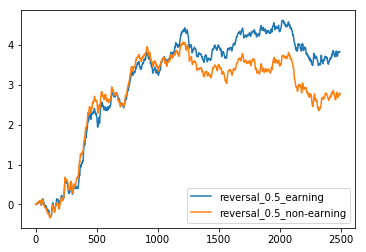


 *** evaluating factor : reversal  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.087525
dtype: float64

 *** evaluating factor : reversal  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.046319
dtype: float64


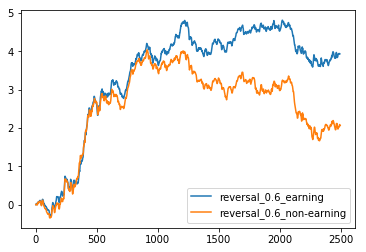


 *** evaluating factor : reversal  with cut-off 0.7
 *** Sharpe ratio: daily_return    0.068988
dtype: float64

 *** evaluating factor : reversal  with cut-off 0.7
 *** Sharpe ratio: daily_return    0.028589
dtype: float64


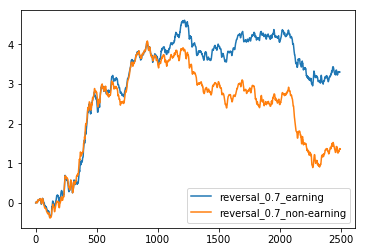


 *** evaluating factor : reversal  with cut-off 0.8
 *** Sharpe ratio: daily_return    0.047469
dtype: float64

 *** evaluating factor : reversal  with cut-off 0.8
 *** Sharpe ratio: daily_return    0.012286
dtype: float64


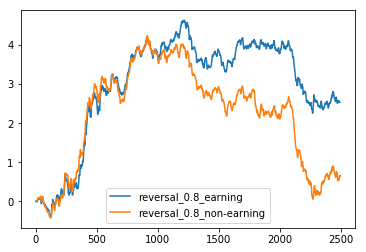


 *** evaluating factor : reversal  with cut-off 0.9
 *** Sharpe ratio: daily_return    0.02073
dtype: float64

 *** evaluating factor : reversal  with cut-off 0.9
 *** Sharpe ratio: daily_return   -0.00752
dtype: float64


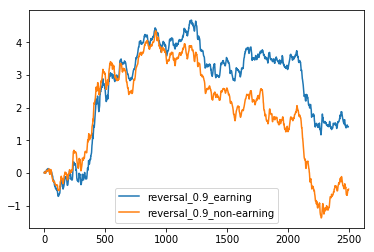

In [219]:
for cutoff in [0.5,0.6,0.7,0.8,0.9]:
    signal = 'reversal'
    result1 = single_factor_eva(market_factors_earning,signal,(cutoff,1-cutoff),'earning')
    result2 = single_factor_eva(market_factors_non_earning,signal,(cutoff,1-cutoff),'non-earning')
    plt.show()


 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.141267
dtype: float64

 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.123943
dtype: float64


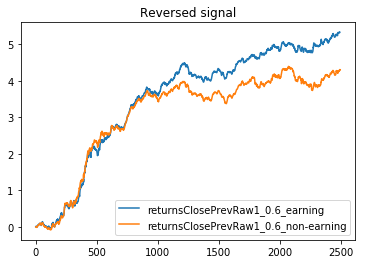


 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.051133
dtype: float64

 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.03623
dtype: float64


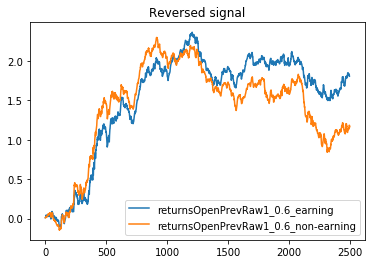


 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.125142
dtype: float64

 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.111338
dtype: float64


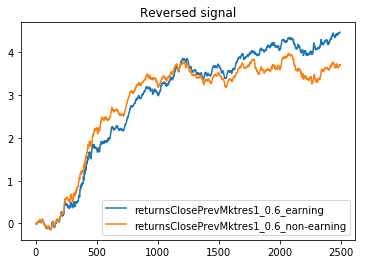


 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.01561
dtype: float64

 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.000233
dtype: float64


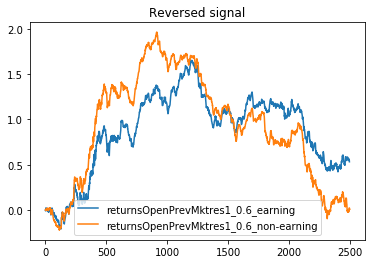


 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.231993
dtype: float64

 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.282153
dtype: float64


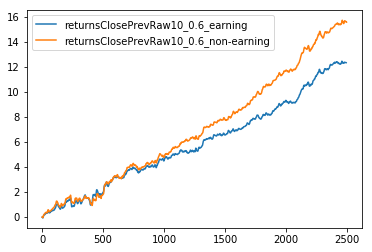


 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.293643
dtype: float64

 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.332593
dtype: float64


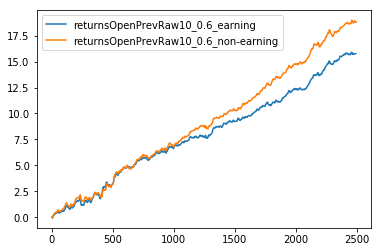


 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.271994
dtype: float64

 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.352726
dtype: float64


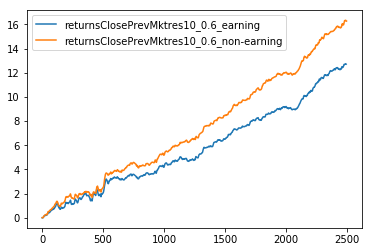


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.340838
dtype: float64

 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.405057
dtype: float64


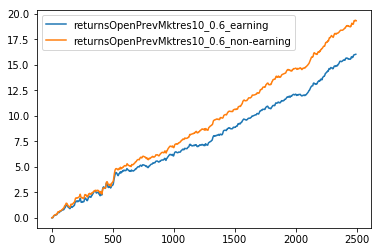


 *** evaluating factor : returnsVolumePrev1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.019993
dtype: float64

 *** evaluating factor : returnsVolumePrev1  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.021114
dtype: float64


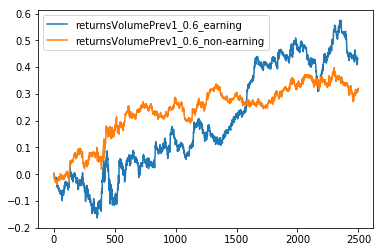


 *** evaluating factor : returnsVolumePrev10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.023466
dtype: float64

 *** evaluating factor : returnsVolumePrev10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.031691
dtype: float64


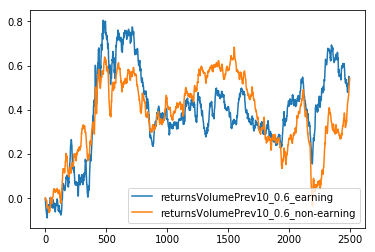


 *** evaluating factor : CloseMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.080974
dtype: float64

 *** evaluating factor : CloseMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.130668
dtype: float64


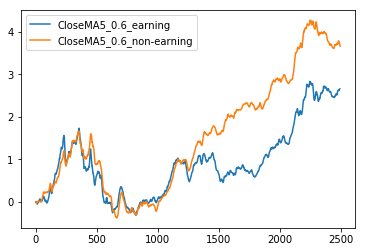


 *** evaluating factor : CloseMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.067378
dtype: float64

 *** evaluating factor : CloseMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.119007
dtype: float64


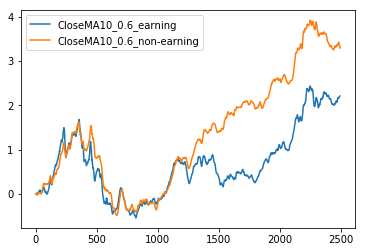


 *** evaluating factor : CloseMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.040287
dtype: float64

 *** evaluating factor : CloseMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.0888
dtype: float64


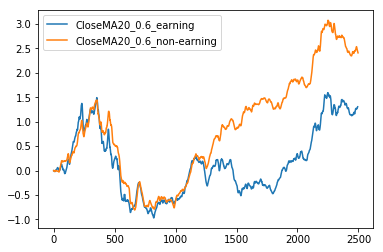


 *** evaluating factor : returnsCloseMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.087538
dtype: float64

 *** evaluating factor : returnsCloseMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.046334
dtype: float64


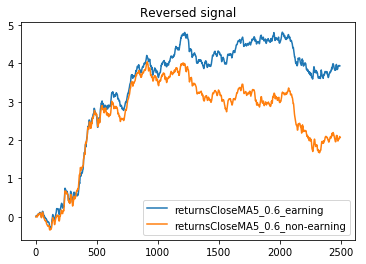


 *** evaluating factor : returnsCloseMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.078441
dtype: float64

 *** evaluating factor : returnsCloseMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.120537
dtype: float64


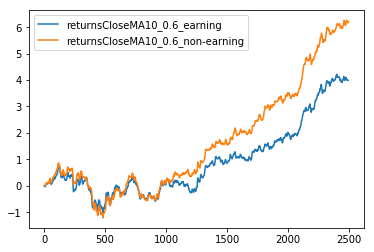


 *** evaluating factor : returnsCloseMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.272402
dtype: float64

 *** evaluating factor : returnsCloseMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.341766
dtype: float64


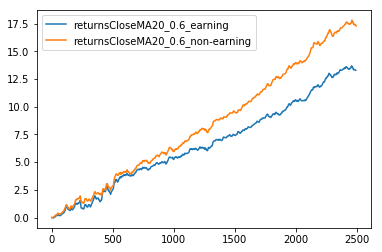


 *** evaluating factor : VolumeMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.107572
dtype: float64

 *** evaluating factor : VolumeMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.056306
dtype: float64


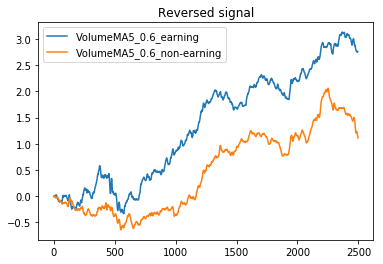


 *** evaluating factor : VolumeMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.118777
dtype: float64

 *** evaluating factor : VolumeMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.062998
dtype: float64


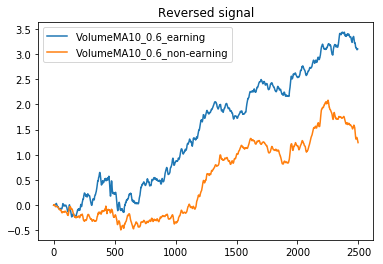


 *** evaluating factor : VolumeMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.108649
dtype: float64

 *** evaluating factor : VolumeMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.072493
dtype: float64


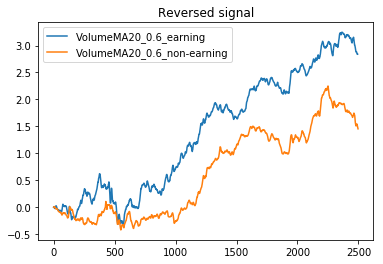


 *** evaluating factor : returnsVolumeMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.053327
dtype: float64

 *** evaluating factor : returnsVolumeMA5  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.029612
dtype: float64


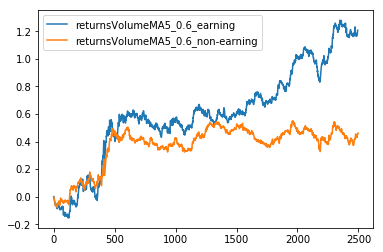


 *** evaluating factor : returnsVolumeMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.062946
dtype: float64

 *** evaluating factor : returnsVolumeMA10  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.039292
dtype: float64


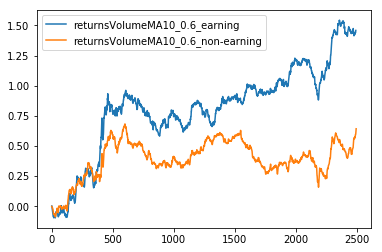


 *** evaluating factor : returnsVolumeMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.029885
dtype: float64

 *** evaluating factor : returnsVolumeMA20  with cut-off 0.6
 *** Sharpe ratio: daily_return    0.042442
dtype: float64


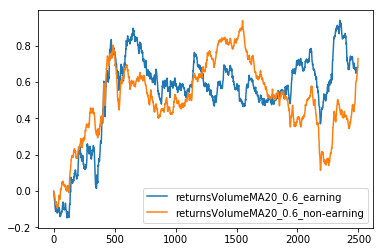

In [225]:
if_reverse = [True]*4+[False]*9+[True]+[False]*2+[True]*3+[False]*3

signals = ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
               'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
               'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
               'returnsClosePrevMktres10', 'returnsOpenPrevMktres10','returnsVolumePrev1',
               'returnsVolumePrev10', 'CloseMA5', 'CloseMA10', 'CloseMA20',
               'returnsCloseMA5', 'returnsCloseMA10', 'returnsCloseMA20', 'VolumeMA5',
               'VolumeMA10', 'VolumeMA20', 'returnsVolumeMA5', 'returnsVolumeMA10',
               'returnsVolumeMA20']

assert len(if_reverse)==len(signals)

for i in range(len(signals)):
    reverse = if_reverse[i]
    signal = signals[i]
    cutoff = 0.6
    result1 = single_factor_eva(market_factors_earning,signal,cutoff,'earning',reverse)
    result2 = single_factor_eva(market_factors_non_earning,signal,cutoff,'non-earning',reverse)
    if reverse:
        plt.title('Reversed signal')
    plt.show()

In [245]:
enhance_ratio = 100.0
market_factors['modified_earning_flag'] = market_factors['earning_period_flag'].apply(lambda x:-enhance_ratio if x else -1.0)

for i in range(len(signals)):
    reverse = if_reverse[i]
    if reverse:
        market_factors['reverse_'+signals[i]] = -market_factors[signals[i]]
        market_factors['earnings_enhanced_reverse_'+signals[i]] = market_factors['modified_earning_flag']*market_factors[signals[i]]
        
market_factors.columns

Index(['index', 'Unnamed: 0', 'time', 'assetCode', 'assetName', 'volume',
       'close', 'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'returnsVolumePrev1',
       'returnsVolumePrev10', 'CloseMA5', 'CloseMA10', 'CloseMA20',
       'returnsCloseMA5', 'returnsCloseMA10', 'returnsCloseMA20', 'VolumeMA5',
       'VolumeMA10', 'VolumeMA20', 'returnsVolumeMA5', 'returnsVolumeMA10',
       'returnsVolumeMA20', 'date', 'earning_period_flag', 'reversal',
       'modified_earning_flag', 'reverse_returnsClosePrevRaw1',
       'reverse_returnsOpenPrevRaw1', 'reverse_returnsClosePrevMktres1',
       'reverse_returnsOpenPrevMktres1', 'reverse_returnsCloseMA5',
       'reverse_VolumeMA5', 'reverse_VolumeMA10', 'reverse_VolumeMA20',
       'earnings_enhanced_reverse_retu

### Earning enhancement 1: trade both earning and non-earning stocks, but adjust reversal scores
#### This method shows little improvement because the earning signal return is diluted.


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.156808
dtype: float64

 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.13715
dtype: float64


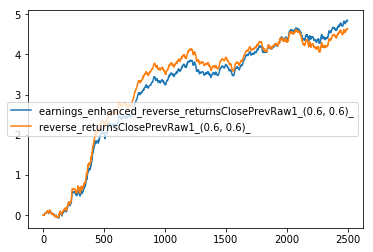


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.061454
dtype: float64

 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.044679
dtype: float64


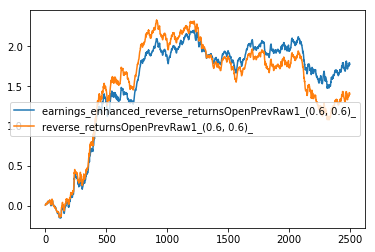


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.136799
dtype: float64

 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.124913
dtype: float64


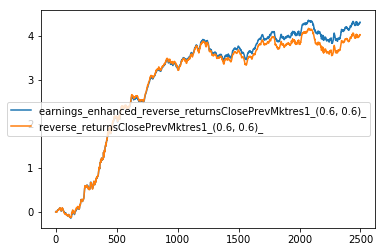


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.022894
dtype: float64

 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.005918
dtype: float64


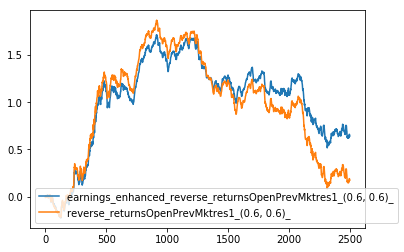


 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.071456
dtype: float64

 *** evaluating factor : reverse_returnsCloseMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.059806
dtype: float64


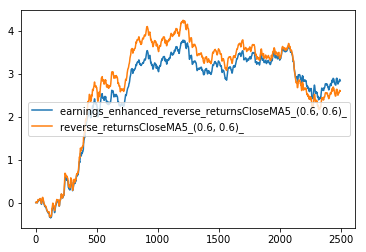


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.011698
dtype: float64

 *** evaluating factor : reverse_VolumeMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.084732
dtype: float64


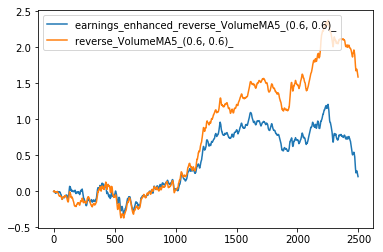


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.017377
dtype: float64

 *** evaluating factor : reverse_VolumeMA10  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.096213
dtype: float64


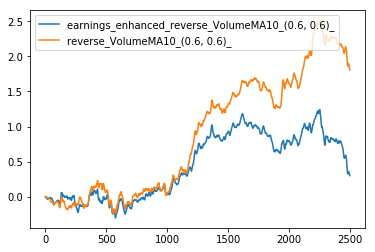


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.017376
dtype: float64

 *** evaluating factor : reverse_VolumeMA20  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.096013
dtype: float64


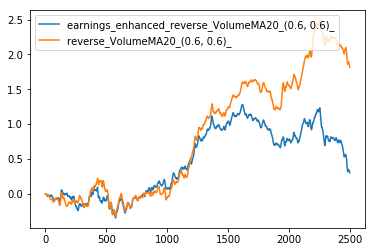

In [267]:
cutoff = (0.6,0.6)
for signal in market_factors.columns:
    if 'earnings_enhanced_reverse' in signal:
        single_factor_eva(market_factors,signal,cutoff)
        single_factor_eva(market_factors,signal[18:],cutoff)
        plt.show()

In [259]:
sum(market_factors[market_factors['earning_period_flag']==True]['returnsClosePrevRaw1']<0)/sum(market_factors['earning_period_flag']==True)

0.47821604417175934

In [260]:
sum(market_factors[market_factors['earning_period_flag']==True]['returnsClosePrevRaw1']>0)/sum(market_factors['earning_period_flag']==True)

0.5090526660177156

In [262]:
sum(market_factors['earning_period_flag']==True)/len(market_factors)

0.24363012118084035

In [268]:
market_factors_earning = market_factors[market_factors['earning_period_flag']==True].reset_index(drop=True)
market_factors_non_earning = market_factors[market_factors['earning_period_flag']==False].reset_index(drop=True)

### Earning enhancement 2: trade only stocks within one week of earning period
#### This method avoids return dilution and shows great improvement over standard reversal, esp. for volume signals 


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.141494
dtype: float64

 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.13715
dtype: float64


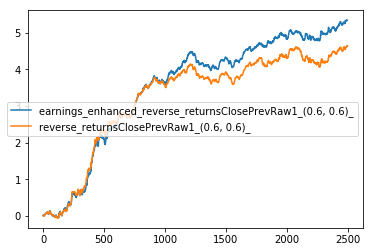


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.051315
dtype: float64

 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.044679
dtype: float64


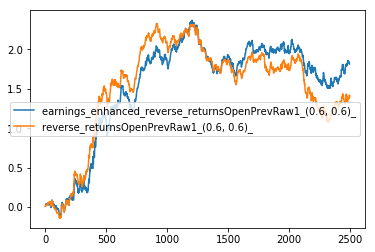


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.125142
dtype: float64

 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.124913
dtype: float64


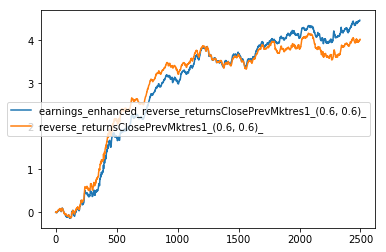


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.01561
dtype: float64

 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.005918
dtype: float64


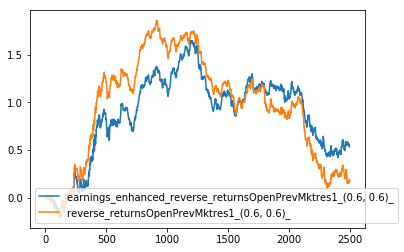


 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.087525
dtype: float64

 *** evaluating factor : reverse_returnsCloseMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.059806
dtype: float64


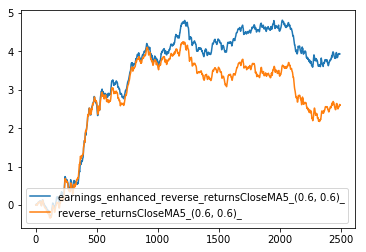


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.107572
dtype: float64

 *** evaluating factor : reverse_VolumeMA5  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.084732
dtype: float64


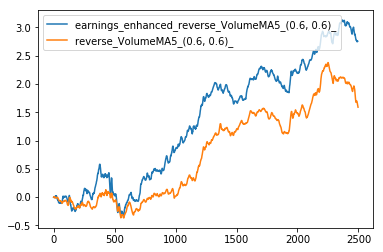


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.118777
dtype: float64

 *** evaluating factor : reverse_VolumeMA10  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.096213
dtype: float64


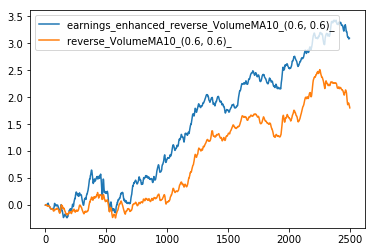


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.108649
dtype: float64

 *** evaluating factor : reverse_VolumeMA20  with cut-off (0.6, 0.6)
 *** Sharpe ratio: daily_return    0.096013
dtype: float64


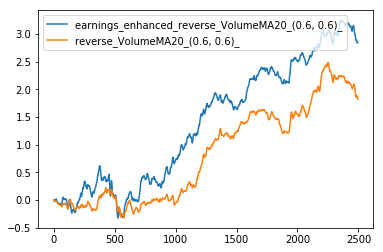

In [269]:
cutoff = (0.6,0.6)
for signal in market_factors.columns:
    if 'earnings_enhanced_reverse' in signal:
        single_factor_eva(market_factors_earning,signal,cutoff)
        single_factor_eva(market_factors,signal[18:],cutoff)
        plt.show()

# Analysis

In [78]:
def include_earning( x ):
    try:
        x_list = x.lower().split(' ')
        return 'earning' in x_list or 'earnings' in x_list
    except:
        return False

In [79]:
news_train_df['earning_flag'] = news_train_df['headline'].apply(include_earning)
news_train_df['RES_flag'] = news_train_df['subjects'].apply(lambda x: '\'RES\'' in x)
news_train_df['RES_earning_flag'] = news_train_df['RES_flag'] & news_train_df['earning_flag']

In [80]:
print(Counter(news_train_df['earning_flag']))
print(Counter(news_train_df['RES_flag']))
print(Counter(news_train_df['RES_earning_flag']))

Counter({False: 9109179, True: 219571})
Counter({False: 6787512, True: 2541238})
Counter({False: 9177316, True: 151434})


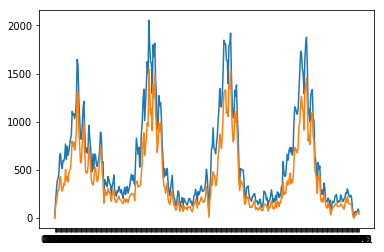

In [84]:
for earning_flag in ['earning_flag','RES_earning_flag']:
    date_earning_count = news_train_df.groupby(['date'])[earning_flag].sum()
    plt.plot(date_earning_count)
plt.show()

In [71]:
date_asset_earning_count = news_train_df.groupby(['assetName','date'])['RES_earning_flag'].sum()

In [72]:
asset_earning_count = news_train_df.groupby(['assetName'])['RES_earning_flag'].sum()

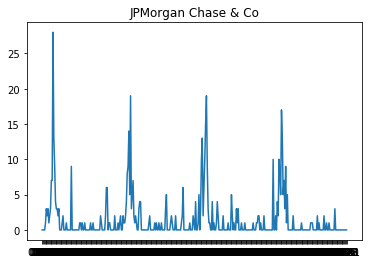

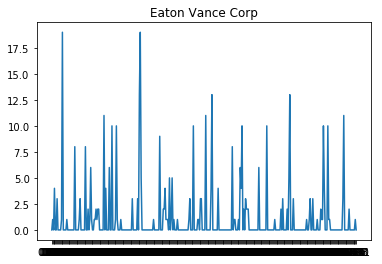

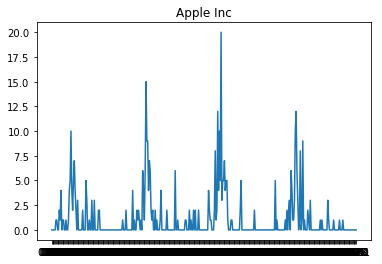

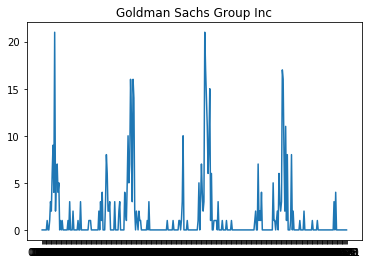

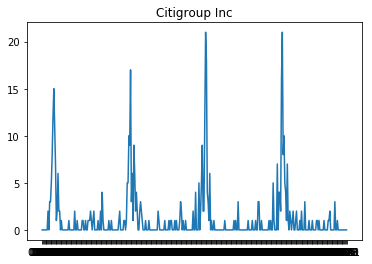

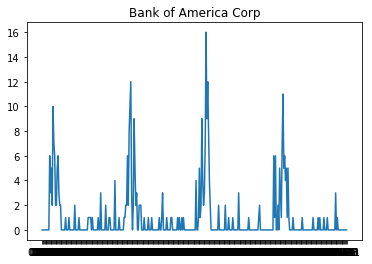

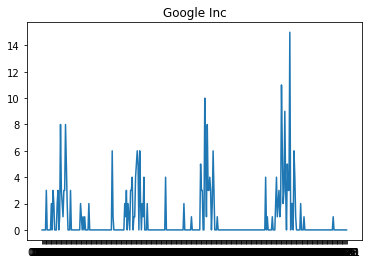

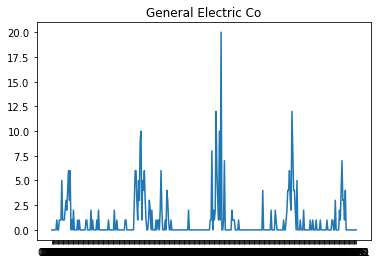

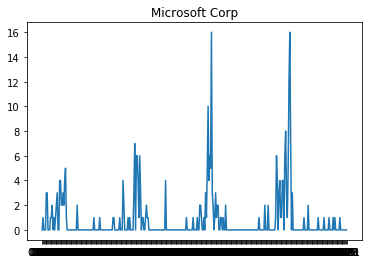

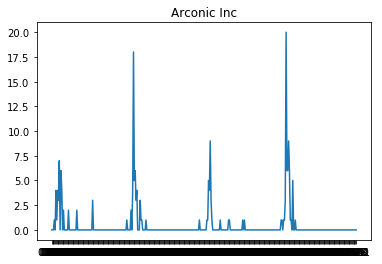

In [74]:
most_earning_list = ['JPMorgan Chase & Co','Eaton Vance Corp','Apple Inc','Goldman Sachs Group Inc','Citigroup Inc',\
                     'Bank of America Corp','Google Inc','General Electric Co','Microsoft Corp','Arconic Inc']

for asset in most_earning_list:
    plt.plot(date_asset_earning_count.loc[asset])
    plt.title(asset)
    plt.show()

In [48]:
asset_earning_count.sort_values(ascending=False)

assetName
JPMorgan Chase & Co                                  1141
Eaton Vance Corp                                     1001
Apple Inc                                             974
Goldman Sachs Group Inc                               952
Citigroup Inc                                         915
Bank of America Corp                                  816
Google Inc                                            793
General Electric Co                                   706
Microsoft Corp                                        679
Arconic Inc                                           662
Intel Corp                                            633
Wells Fargo & Co                                      611
Morgan Stanley                                        597
Exxon Mobil Corp                                      570
Chevron Corp                                          519
International Business Machines Corp                  508
E I du Pont de Nemours and Co                         485
Yaho

# Fixed earnings period

In [20]:
date_earning_count[date_earning_count==date_earning_count[date_earning_count.index<'04-01'].max()]

date
01-28    1647
Name: earning_flag, dtype: int64

In [22]:
date_earning_count[date_earning_count==date_earning_count[(date_earning_count.index>'04-01') & (date_earning_count.index<'07-01')].max()]

date
04-23    2054
Name: earning_flag, dtype: int64

In [23]:
date_earning_count[date_earning_count==date_earning_count[(date_earning_count.index>'07-01') & (date_earning_count.index<'10-01')].max()]

date
07-30    1920
Name: earning_flag, dtype: int64

In [24]:
date_earning_count[date_earning_count==date_earning_count[(date_earning_count.index>'10-01') & (date_earning_count.index<'12-31')].max()]

date
10-29    1877
Name: earning_flag, dtype: int64

In [73]:
market_train_df = pd.read_csv('./market_train_df.csv')

In [74]:
market_train_df.head()

,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0


In [75]:
# Filter unreasonble close/open prices and next 10-day returns
market_train_df = market_train_df[market_train_df['returnsOpenNextMktres10']>=-0.4]
market_train_df = market_train_df[market_train_df['returnsOpenNextMktres10']<  0.4]

In [76]:
market_train_df = market_train_df.reset_index(drop=True)

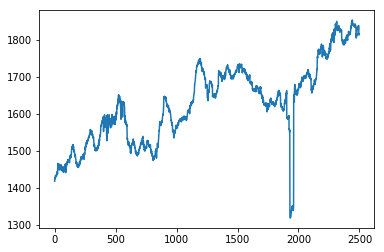

In [77]:
count = 0
count_list = []
curr_date = market_train_df['time'][0]
for date in market_train_df['time']:
    if date == curr_date:
        count+=1
    else:
        count_list.append(count)
        curr_date = date
        count = 1
count_list.append(count)
plt.plot(count_list)

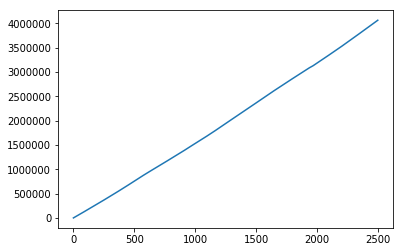

In [78]:
partition_rows = [0] + list(np.cumsum(count_list))
plt.plot(partition_rows)

In [190]:
# Calculate the returns and Sharpe ratio of long-short portfolio for a single factor 
def backtest_single_score( score, num_group = 5, offset = 0 ):
    returns = {}
    for i in range(offset,len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            stock_ret_i = market_train_df['returnsOpenNextMktres10'][l:r]
            score_i = score[l:r]
            index_i = np.argsort(score_i)+l
            tradeable_ret_i = stock_ret_i*market_train_df['universe'][l:r]
            port_ret_i = np.mean(tradeable_ret_i[index_i[-(r-l)//num_group:]])-np.mean(tradeable_ret_i[index_i[:(r-l)//num_group]])
            if market_train_df['date'][l] in returns:
                returns[market_train_df['date'][l]]+=port_ret_i
            else:
                returns[market_train_df['date'][l]]=port_ret_i
        except:
            pass
    #print("Sharpe ratio:",np.mean(returns)/np.std(returns))
    return returns#,np.mean(returns)/np.std(returns)

In [191]:
# Assume we can realize 10-day return in one day and rebalance every day
# Use all the return data
def plot_returns ( returns ):
    net_value = [1.0]
    for ret in returns:
        net_value.append(net_value[-1]*(1+ret))
    plt.plot(net_value)
    plt.legend()

In [192]:
# Rebalance every 10 days
# Only use 1/10 of the data
def plot_returns_real ( returns, offset = 0,label = '' ):
    net_value = [1.0]
    for i in range(offset,len(returns),10):
        net_value.append(net_value[-1]*(1+returns[i]))
    plt.plot(net_value, label = label)
    plt.legend()

In [193]:
all_time_momentum = backtest_single_score(market_train_df['returnsOpenPrevRaw10'])

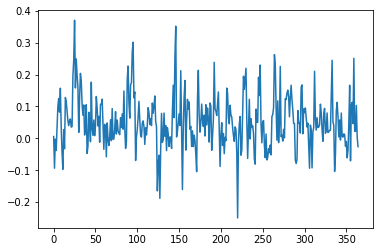

In [194]:
plt.plot(all_time_momentum.values())

In [171]:
len(momentum_spread)

2500

In [138]:
from scipy.stats import describe

In [139]:
describe(all_time_momentum[0])

DescribeResult(nobs=2498, minmax=(-0.08450230465738331, 0.14428099748201897), mean=0.007743625518039128, variance=0.0004949258341441246, skewness=0.41765306053877177, kurtosis=2.460972708320697)

No handles with labels found to put in legend.


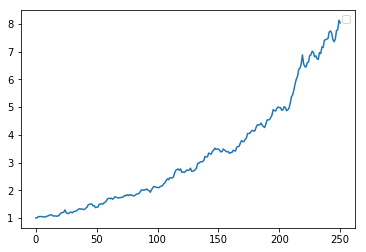

In [88]:
plot_returns_real(all_time_momentum[0])

In [89]:
market_train_df['date'] = news_train_df['time'].apply(lambda x:x[5:10])

In [90]:
def earning_int( x ):
    return -1 if x==1 else 1

In [133]:
l = '1'
r = '2'
market_train_df['earning_period_flag'] = ((market_train_df['date']>'02-'+l) & (market_train_df['date']<'02-'+r)).apply(int)+\
                                         ((market_train_df['date']>'05-'+l) & (market_train_df['date']<'05-'+r)).apply(int)+\
                                         ((market_train_df['date']>'08-'+l) & (market_train_df['date']<'08-'+r)).apply(int)+\
                                         ((market_train_df['date']>'11-'+l) & (market_train_df['date']<'11-'+r)).apply(int)

market_train_df['earning_period_flag'] = market_train_df['earning_period_flag'].apply(earning_int)

In [134]:
market_train_df['earning_reversion'] = market_train_df['earning_period_flag']*market_train_df['returnsOpenPrevRaw10']

In [135]:
earning_reversion_strategy = backtest_single_score(market_train_df['earning_reversion'])

Sharpe ratio: 0.23852830213341514


In [136]:
Counter(market_train_df['earning_period_flag'])

Counter({1: 3587877, -1: 476322})